# <center>Telegram dataset analysis</center>
---

In [33]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt

Total of files 43827
Number of channels: 43730.
Number of chats: 96.


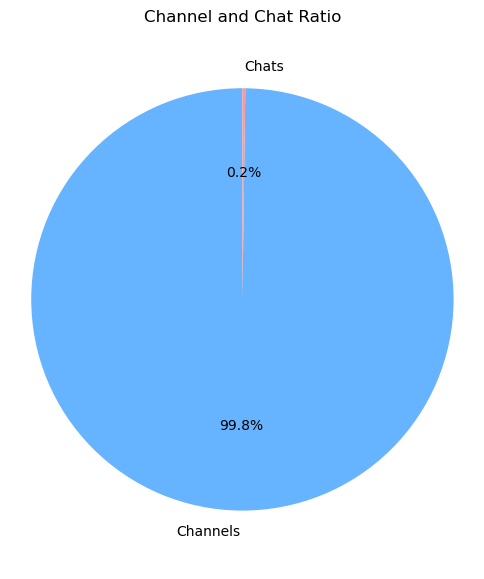

In [44]:
PATHS = glob.glob(f"telegram_2024/extracted/*") 

channel = 0
chat = 0

for path in PATHS:
    path_sep = path.split('/')
    if "channel" in path_sep[2]:
        channel+=1
    elif "chat" in path_sep[2]:
        chat+=1

print(f"Total of files {len(PATHS)}")
print(f"Number of channels: {channel}.")
print(f"Number of chats: {chat}.")        
    
plt.figure(figsize=(6,7))
plt.pie([channel,chat],labels=['Channels', 'Chats'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90)
plt.title('Channel and Chat Ratio')
plt.axis('equal')
plt.show()


In [29]:
FILES = glob.glob(f"telegram_2024/extracted/*/*.tsv.gz")

months = set()
for file in FILES:
    match = re.search(r'/(\d{4}-\d{2})\.tsv\.gz$', file)
    if match:
        months.add(match.group(1))

print(f"Months in dataset: {sorted(months)}.")

Months in dataset: ['2019-08', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12', '2025-01'].


In [46]:
print("\nNumber of appearances per month:")
counts_month = {}
for month in sorted(months):
    count = sum(1 for f in FILES if month in f)
    counts_month[month] = count
    print(f"{month}: {count}")


Number of appearances per month:
2019-08: 1
2023-11: 27603
2023-12: 28640
2024-01: 29588
2024-02: 30112
2024-03: 31074
2024-04: 31807
2024-05: 32683
2024-06: 33319
2024-07: 34106
2024-08: 33852
2024-09: 31742
2024-10: 29589
2024-11: 27787
2024-12: 9741
2025-01: 7004


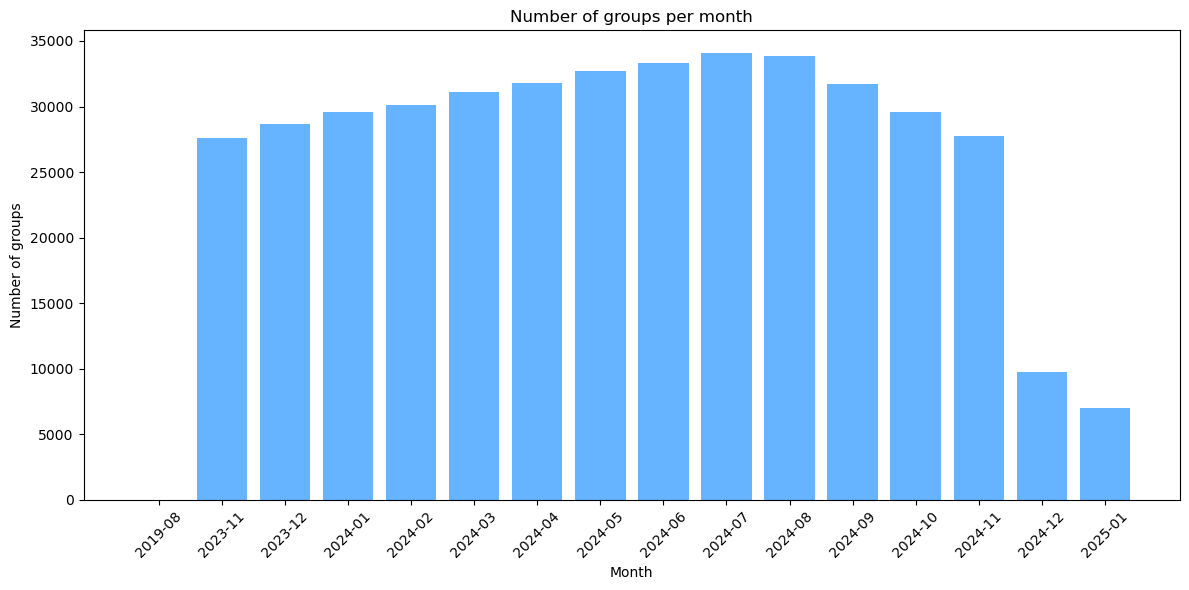

In [48]:
plt.figure(figsize=(12,6))
plt.bar(counts_month.keys(), counts_month.values(), color='#66b3ff')
plt.title('Number of groups per month')
plt.xlabel('Month')
plt.ylabel('Number of groups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()